<a href="https://colab.research.google.com/github/mojtabaSefidi/NoShow_Appointments/blob/Preprocessing/NoShow_Appointments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
sn.set()

In [5]:
!gdown 1R8waoO4GA-0SiyfadnSDcY4FeuNkTV3A
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download joniarroba/noshowappointments
!unzip noshowappointments.zip
os.rename('KaggleV2-May-2016.csv', 'NoShow_Appointments_2016_kaggle.csv')
os.remove("noshowappointments.zip")

Downloading...
From: https://drive.google.com/uc?id=1R8waoO4GA-0SiyfadnSDcY4FeuNkTV3A
To: /content/kaggle.json
100% 73.0/73.0 [00:00<00:00, 119kB/s]
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/2.40M [00:00<?, ?B/s]
100% 2.40M/2.40M [00:00<00:00, 158MB/s]


In [228]:
data = pd.read_csv('NoShow_Appointments_2016_kaggle.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [229]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['Remaining_days'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
data['No-show'] = data['No-show'].map({'No':0, 'Yes':1})
data = data[['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay','AppointmentDay','Remaining_days', 'Age',
             'Neighbourhood','Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap',
             'SMS_received', 'No-show']]
data['PatientId'] = data['PatientId'].apply(lambda x: str(int(x)))
data['AppointmentID'] = data['AppointmentID'].apply(lambda x: str(int(x)))

In [230]:
data.shape

(110527, 15)

In [231]:
data.dtypes

PatientId                      object
AppointmentID                  object
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Remaining_days                  int64
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                         int64
dtype: object

In [232]:
print('number of unique values for each columns:')
data.nunique()

number of unique values for each columns:


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Remaining_days       131
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [233]:
print('number of null values for each columns:')
data.isnull().sum()

number of null values for each columns:


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Remaining_days    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [234]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Remaining_days,110527.0,9.0,15.0,-7.0,-1.0,3.0,14.0,178.0
Age,110527.0,37.0,23.0,-1.0,18.0,37.0,55.0,115.0
Scholarship,110527.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Hipertension,110527.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Diabetes,110527.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Alcoholism,110527.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Handcap,110527.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
SMS_received,110527.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
No-show,110527.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


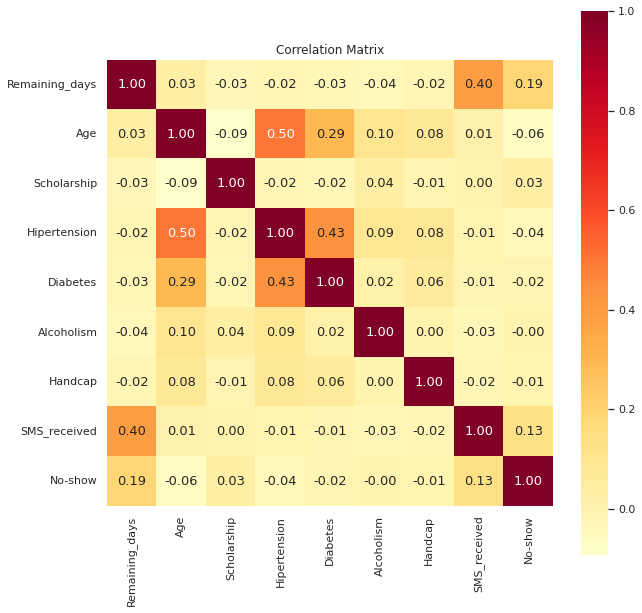

In [235]:
feature_correlation = data.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix')
sn.heatmap(feature_correlation, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':13}, cmap='YlOrRd')

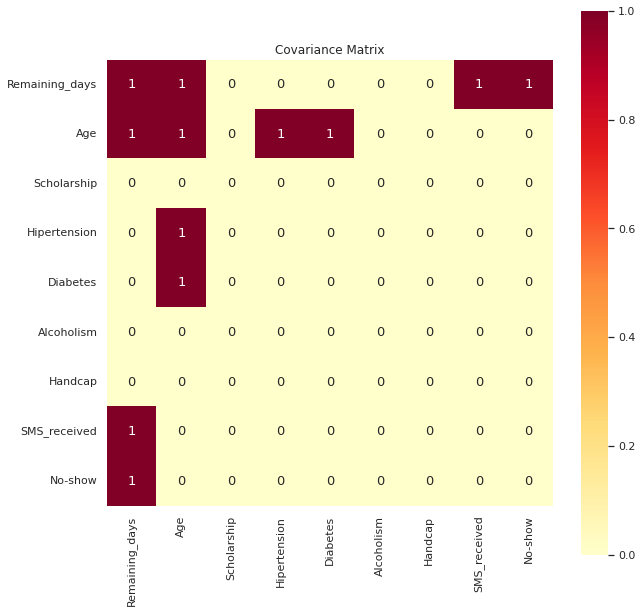

In [236]:
feature_covariance = data.cov()
for name in feature_covariance.columns :
      feature_covariance[name] = feature_covariance[name].astype(int)
feature_covariance[feature_covariance == 0] = 0
feature_covariance[feature_covariance > 0] = 1
feature_covariance[feature_covariance < 0] = -1
plt.figure(figsize=(10,10))
plt.title('Covariance Matrix')
sn.heatmap(feature_covariance, cbar=True, square= True, annot=True, annot_kws={'size':13}, cmap='YlOrRd')

In [237]:
len(data['Neighbourhood'].unique())

81

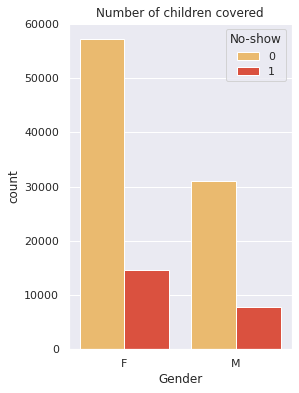

In [238]:
plt.figure(figsize=(4,6))
plt.title('Number of children covered')
sn.countplot(x=data['Gender'],hue=data['No-show'], palette='YlOrRd')

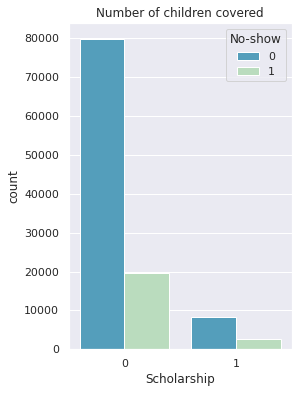

In [239]:
plt.figure(figsize=(4,6))
plt.title('Number of children covered')
sn.countplot(x=data['Scholarship'],hue=data['No-show'], palette='GnBu_r')

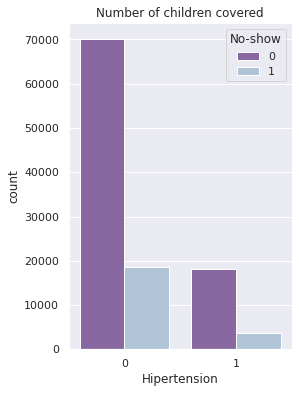

In [240]:
plt.figure(figsize=(4,6))
plt.title('Number of children covered')
sn.countplot(x=data['Hipertension'],hue=data['No-show'], palette='BuPu_r')

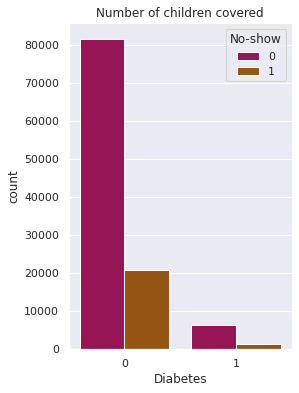

In [241]:
plt.figure(figsize=(4,6))
plt.title('Number of children covered')
sn.countplot(x=data['Diabetes'],hue=data['No-show'], palette='brg')

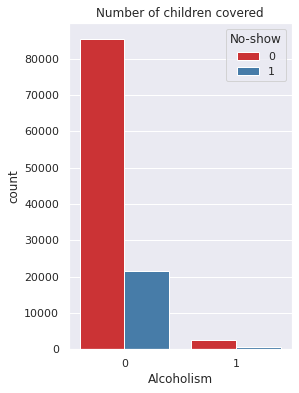

In [242]:
plt.figure(figsize=(4,6))
plt.title('Number of children covered')
sn.countplot(x=data['Alcoholism'],hue=data['No-show'], palette='Set1')

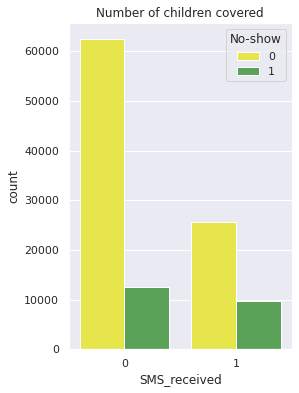

In [243]:
plt.figure(figsize=(4,6))
plt.title('Number of children covered')
sn.countplot(x=data['SMS_received'],hue=data['No-show'], palette='Set1_r')

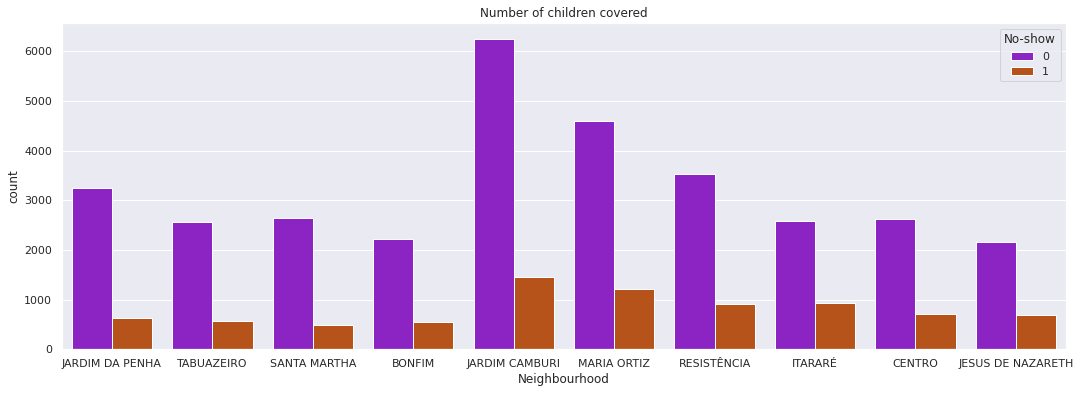

In [244]:
plt.figure(figsize=(18,6))
plt.title('Number of children covered')
x = list(data['Neighbourhood'].value_counts().iloc[:10].index)
df = data[data['Neighbourhood'].isin(x)]
sn.countplot(x=df['Neighbourhood'],hue=data['No-show'], palette='gnuplot')

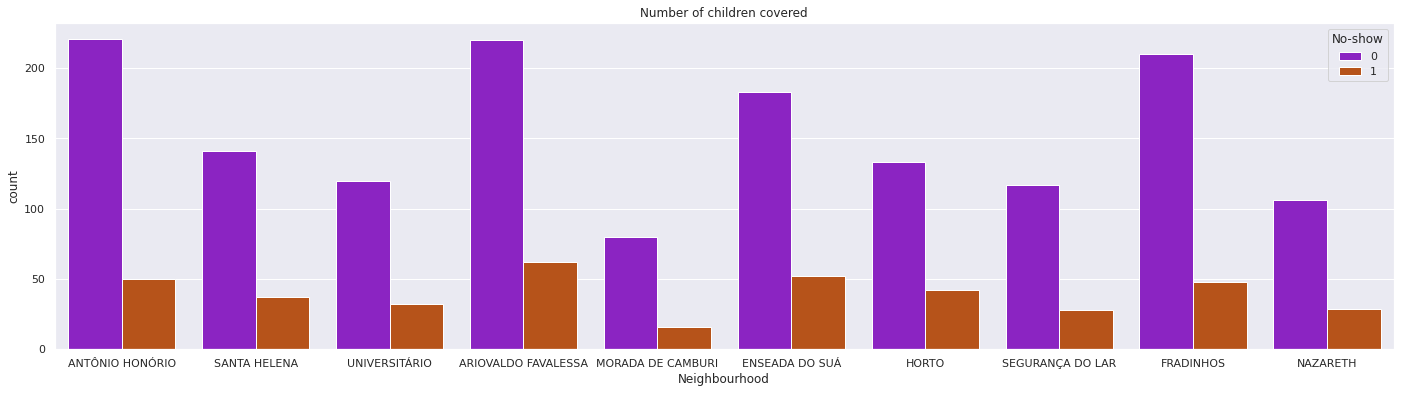

In [245]:
plt.figure(figsize=(24,6))
plt.title('Number of children covered')
x = list(data['Neighbourhood'].value_counts().iloc[65:75].index)
df = data[data['Neighbourhood'].isin(x)]
sn.countplot(x=df['Neighbourhood'],hue=data['No-show'], palette='gnuplot')

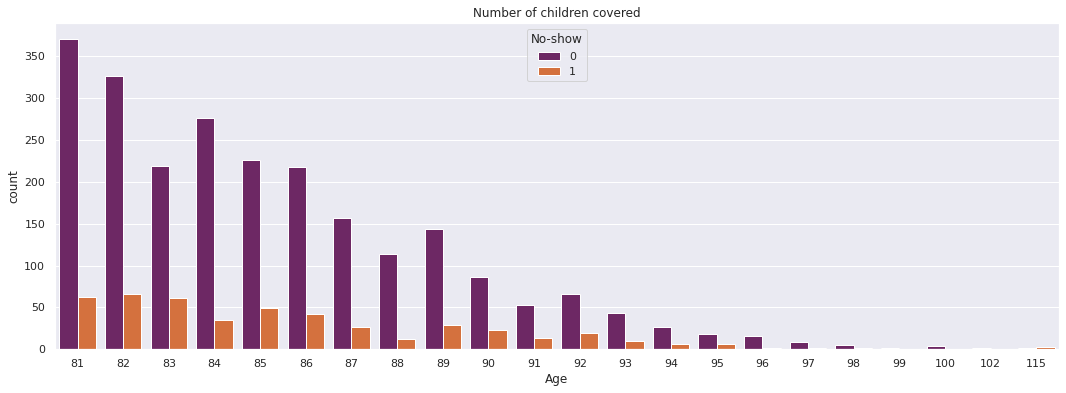

In [246]:
plt.figure(figsize=(18,6))
plt.title('Number of children covered')
sn.countplot(x=data[data['Age']>80]['Age'],hue=data['No-show'], palette='inferno')

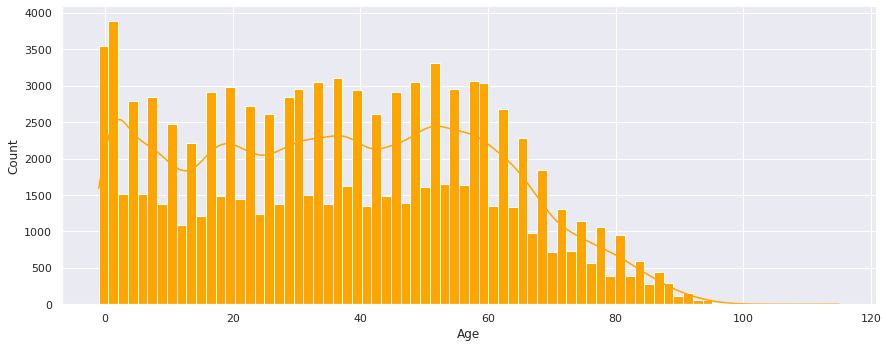

In [247]:
sn.displot(data["Age"], color='orange', kde=True, aspect=2.5, alpha = 1)

In [248]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Remaining_days', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

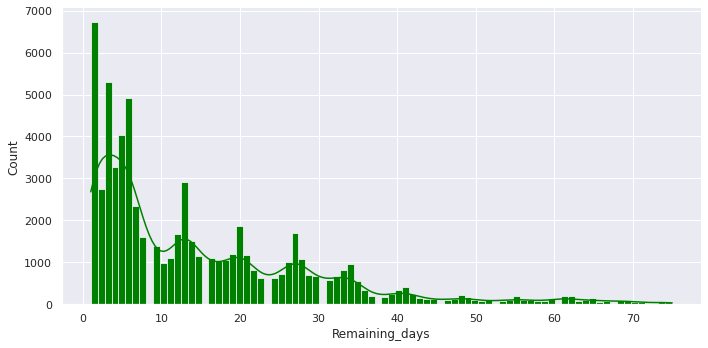

In [249]:
r = data["Remaining_days"].quantile(0.995)
x = data[data["Remaining_days"]>0]
sn.displot(x[x["Remaining_days"]<r]["Remaining_days"], color='Green', kde=True, aspect=2, alpha = 1)

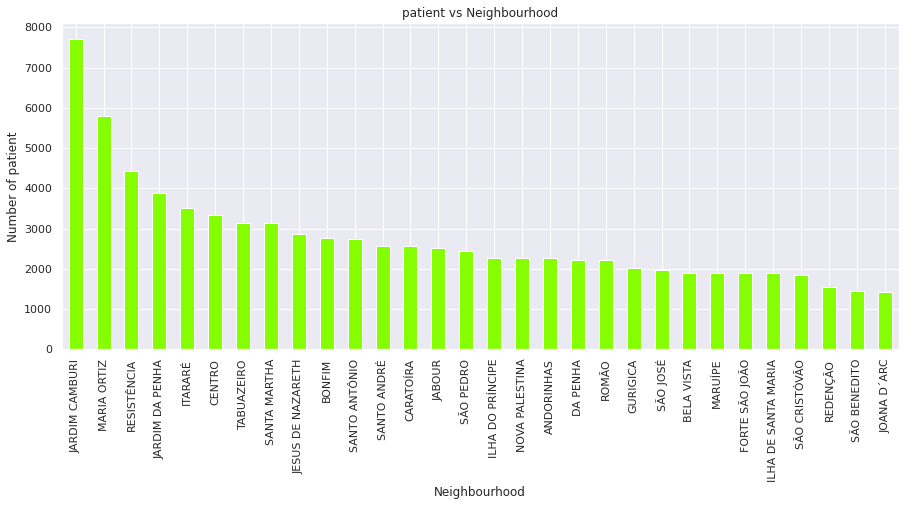

In [250]:
plt.figure(figsize=(15,6))
plt.xlabel('Neighbourhood')
plt.ylabel('Number of patient')
plt.title('patient vs Neighbourhood')
data['Neighbourhood'].value_counts().iloc[:30].plot(kind = 'bar',color='#85FF00')

In [254]:
waitingdays = data.groupby(by=['Remaining_days','No-show'])
waitingdays = waitingdays.count()['PatientId'].unstack()
waitingdays.fillna(value=0, inplace=True)
waitingdays.reset_index(drop=False, inplace=True)
waitingdays.info()

No-show,Remaining_days,0,1
0,-7,0.0,1.0
1,-2,0.0,4.0
2,-1,36771.0,1792.0
3,0,4100.0,1113.0
4,1,5123.0,1602.0
...,...,...,...
126,154,4.0,6.0
127,161,9.0,2.0
128,168,7.0,1.0
129,175,10.0,6.0


In [277]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


In [278]:
feature , target = data[['Scholarship','SMS_received','Remaining_days']] , data['No-show']
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, shuffle=True)


In [279]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [280]:
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17728
           1       0.42      0.01      0.02      4378

    accuracy                           0.80     22106
   macro avg       0.61      0.50      0.46     22106
weighted avg       0.73      0.80      0.72     22106

[[17662    66]
 [ 4330    48]]


In [281]:
Reg = LogisticRegression()
Reg.fit(X_train, y_train)

y_pred = Reg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17728
           1       0.22      0.01      0.02      4378

    accuracy                           0.80     22106
   macro avg       0.51      0.50      0.45     22106
weighted avg       0.69      0.80      0.72     22106

[[17534   194]
 [ 4324    54]]


In [284]:
SVM = LinearSVC(C = 0.0001)
SVM.fit(X_train, y_train)

y_pred = SVM.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17728
           1       0.23      0.01      0.01      4378

    accuracy                           0.80     22106
   macro avg       0.51      0.50      0.45     22106
weighted avg       0.69      0.80      0.71     22106

[[17626   102]
 [ 4348    30]]


In [285]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     17728
           1       0.36      0.07      0.11      4378

    accuracy                           0.79     22106
   macro avg       0.58      0.52      0.50     22106
weighted avg       0.72      0.79      0.73     22106

[[17200   528]
 [ 4086   292]]


In [297]:
RFC = RandomForestClassifier(max_depth=20, random_state=0, n_estimators=10)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17728
           1       0.42      0.01      0.03      4378

    accuracy                           0.80     22106
   macro avg       0.61      0.50      0.46     22106
weighted avg       0.73      0.80      0.72     22106

[[17639    89]
 [ 4313    65]]
